XGBoost

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

In [42]:
train_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_transaction.csv')
train_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_identity.csv')

test_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_transaction.csv')
test_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_identity.csv')
submission = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/sample_submission.csv')

Feature ranking:
1. feature TransactionID (0.024)
2. feature TransactionDT (0.024)
3. feature TransactionAmt (0.022)
4. feature card1 (0.020)
5. feature card2 (0.019)
6. feature C1 (0.017)
7. feature addr1 (0.016)
8. feature C13 (0.015)
9. feature C11 (0.011)
10. feature C14 (0.011)
11. feature card5 (0.010)
12. feature C6 (0.009)
13. feature D15 (0.009)
14. feature C2 (0.009)
15. feature V258 (0.008)
16. feature V307 (0.008)
17. feature D1 (0.007)
18. feature V45 (0.007)
19. feature D2 (0.007)
20. feature dist1 (0.007)
21. feature C12 (0.007)
22. feature id_02 (0.007)
23. feature D10 (0.007)
24. feature D4 (0.006)
25. feature V308 (0.006)
26. feature V310 (0.006)
27. feature V199 (0.006)
28. feature V201 (0.006)
29. feature V86 (0.006)
30. feature C7 (0.006)
31. feature V317 (0.006)
32. feature V127 (0.006)
33. feature V87 (0.005)
34. feature V257 (0.005)
35. feature id_20 (0.005)
36. feature V200 (0.005)
37. feature V283 (0.005)
38. feature V306 (0.005)
39. feature C8 (0.005)
40. fea

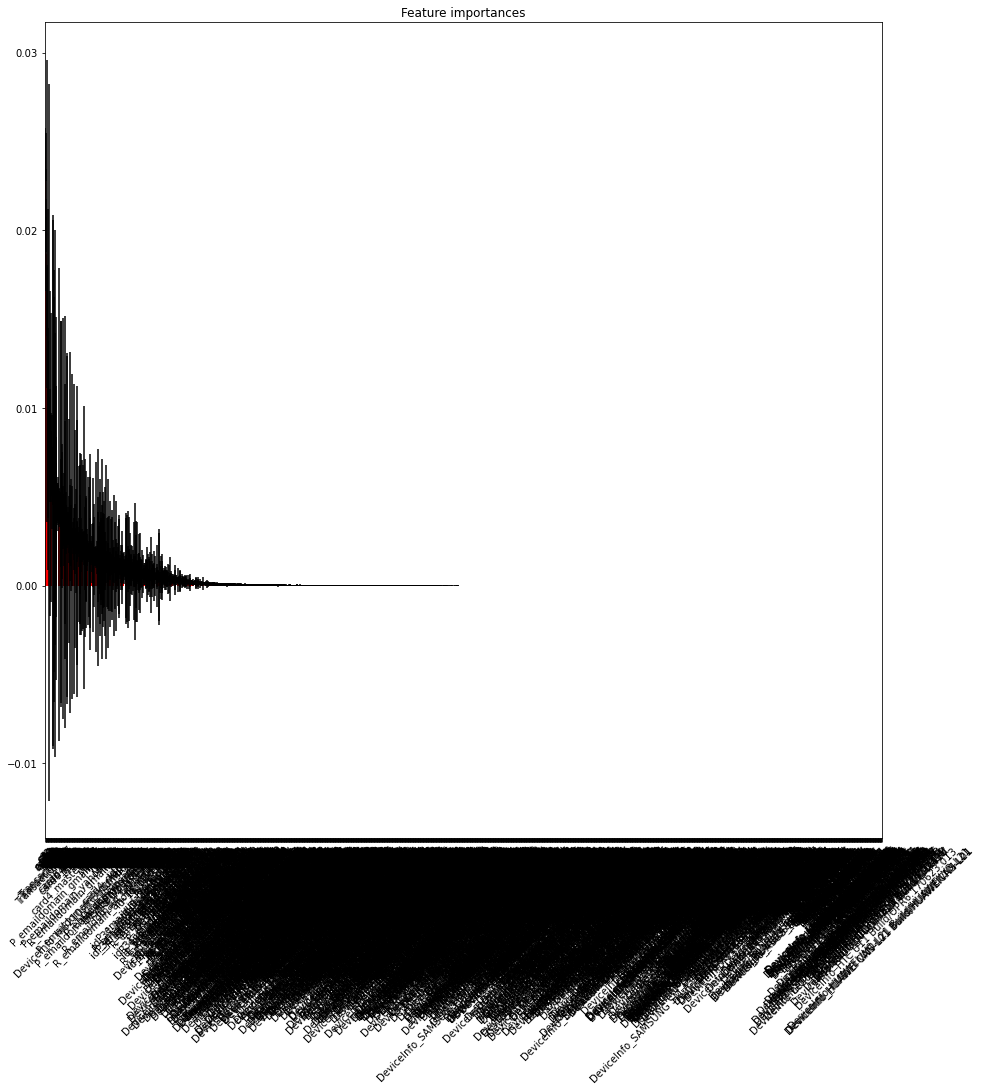

In [ ]:
# feature_importance
train_m = train_t.merge(train_i, how='left', on='TransactionID')
train_m = pd.get_dummies(data=train_m, columns=list(train_m.dtypes[train_m.dtypes.values=='object'].index))
train_m.fillna(-999, inplace=True)

X = train_m.drop(columns=['isFraud'])
y = train_m.isFraud

forest = RandomForestClassifier()
forest.fit(X,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')

for f in range(X.shape[1]):
    print('{}. feature {} ({:.3f})'.format(f + 1, X.columns[indices][f], importances[indices[f]]))

plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

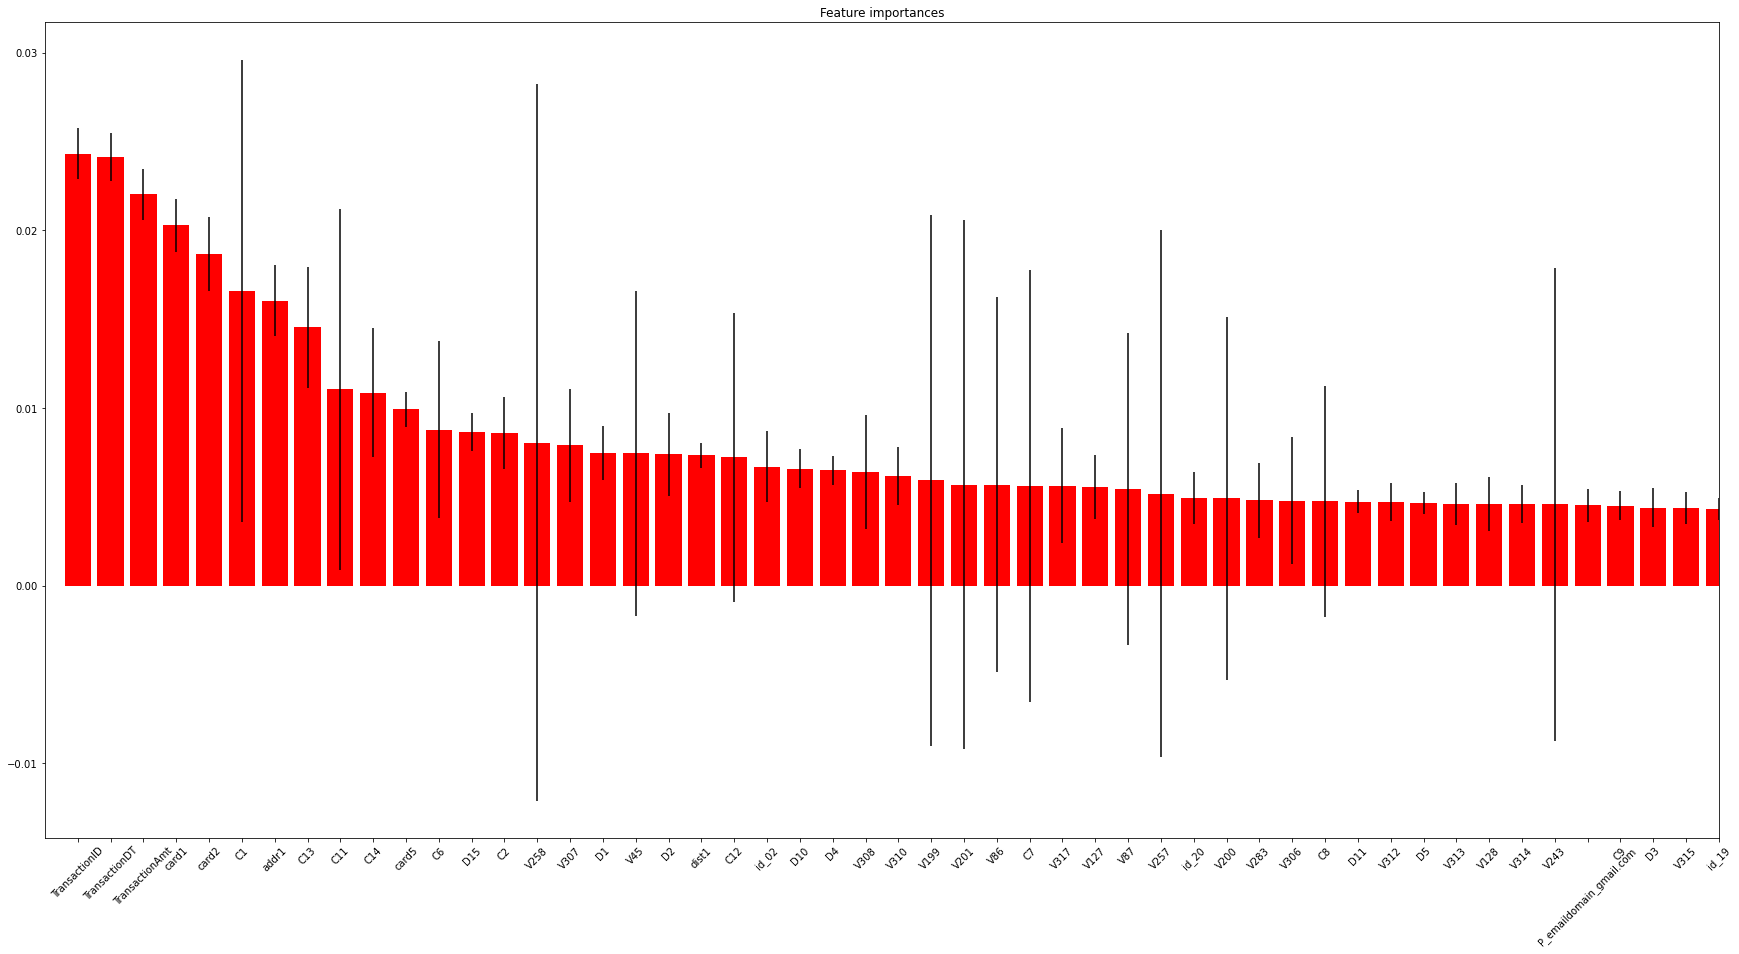

In [ ]:
plt.figure(figsize=(30,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, 50])
plt.show()

In [ ]:
X_train = train_m.loc[:,list(X.columns[indices][:70])]
y_train = train_m.isFraud

In [ ]:

clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,

)
clf.fit(X_train, y_train)

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:47:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=-999, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=2019, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [108]:
test_i.columns = test_i.columns.str.replace('-',"_")

In [118]:
test_m = test_t.merge(test_i, how='left', on='TransactionID')
test_m = pd.get_dummies(data=test_m, columns=list(test_m.dtypes[test_m.dtypes.values=='object'].index))
test_m.fillna(-999, inplace=True)
X_test = test_m.loc[:,list(X.columns[indices][:70])]
X_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,C1,addr1,C13,C11,C14,...,V246,card4_visa,V285,id_01,card4_mastercard,V282,V188,V190,V189,V318
0,3663549,18403224,31.950,10409,111.0,6.0,170.0,115.0,5.0,6.0,...,-999.0,1,1.0,-999.0,0,0.0,-999.0,-999.0,-999.0,0.0
1,3663550,18403263,49.000,4272,111.0,3.0,299.0,12.0,1.0,2.0,...,-999.0,1,4.0,-999.0,0,0.0,-999.0,-999.0,-999.0,0.0
2,3663551,18403310,171.000,4476,574.0,2.0,472.0,22.0,2.0,2.0,...,-999.0,1,4.0,-999.0,0,0.0,-999.0,-999.0,-999.0,0.0
3,3663552,18403310,284.950,10989,360.0,5.0,205.0,7.0,2.0,4.0,...,-999.0,1,0.0,-999.0,0,1.0,-999.0,-999.0,-999.0,0.0
4,3663553,18403317,67.950,18018,452.0,6.0,264.0,14.0,6.0,6.0,...,-999.0,0,3.0,-999.0,1,1.0,-999.0,-999.0,-999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,13832,375.0,1.0,284.0,1.0,1.0,1.0,...,-999.0,0,0.0,-999.0,1,1.0,-999.0,-999.0,-999.0,0.0
506687,4170236,34214287,12.173,3154,408.0,1.0,-999.0,3.0,1.0,1.0,...,1.0,0,2.0,-45.0,1,2.0,1.0,1.0,1.0,0.0
506688,4170237,34214326,49.000,16661,490.0,1.0,327.0,1.0,1.0,1.0,...,-999.0,1,0.0,-999.0,0,1.0,-999.0,-999.0,-999.0,0.0
506689,4170238,34214337,202.000,16621,516.0,1.0,177.0,1.0,1.0,1.0,...,-999.0,0,0.0,-999.0,1,1.0,-999.0,-999.0,-999.0,0.0


In [ ]:
submission['isFraud'] = clf.predict_proba(X_test)[:,1]
submission.to_csv('sample_xgboost.csv')

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Correlation / Feature importance / PCA

In [1]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot): # RF로 중요한 feature 확인

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df